Let $D = \{(x_i, y_i)\}_{i=1}^N$ be a training dataset. The goal is to train a linear classifier in a form of $y(x) = sign(x^Tw + b)$

## SVM with soft-margins
__Primal problem__

$$ \min_{\xi_i, w, b} \sum_{i=1}^N \xi_i + C\|w\|_2^2$$
$$\text{s.t.} ~~~~ y_i (x_i^Tw + b) \geq 1 - \xi_i$$
$$ \xi_i \geq 0 $$

Lets rewrite the conditions on $\xi_i$:
$$
\begin{cases}
\xi_i \geq& 1 - y_i (x_i^Tw + b) \\
\xi_i \geq& 0
\end{cases}
$$
taking into account this conditions and the fact that in the objective we want to minimize $\xi_i$ we may conclude that:

$$\xi_i = \max(0, 1 - y_i (x_i^Tw + b))$$

And the optimization problem can be formulated as follows:

$$ \min_{\xi_i, w, b} \sum_{i=1}^N \max(0, 1 - y_i (x_i^Tw + b)) + C\|w\|_2^2$$



## Logistic Regression

In logistic regression we model the $p(y=+1|x)$ via linear function and sigmoid:
$$ p(y=+1|x) = y(x) = \sigma(x^Tw + b) = \dfrac{1}{1 + e^{-(x^Tw + b)}} $$

To find the parameters $w, b$ we follow maximum-likelihood approach, and the optimization problem is the following:

$$ \max_{w, b} \sum_{i=1}^N [y_i = +1]\log(\sigma(x^Tw + b)) + [y_i = -1]\log(1 - \sigma(x^Tw + b)) $$


In [89]:
from cvxpysvm import SVM, LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


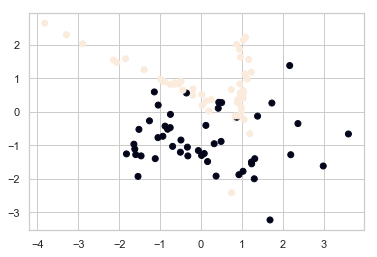

In [183]:
from sklearn.datasets import make_classification, make_blobs

# X, y = make_blobs(centers=2, random_state=42)
X, y = make_classification(class_sep=1, random_state=2, n_features=2, n_redundant=0)
plt.scatter(X[:, 0], X[:, 1], c=y)

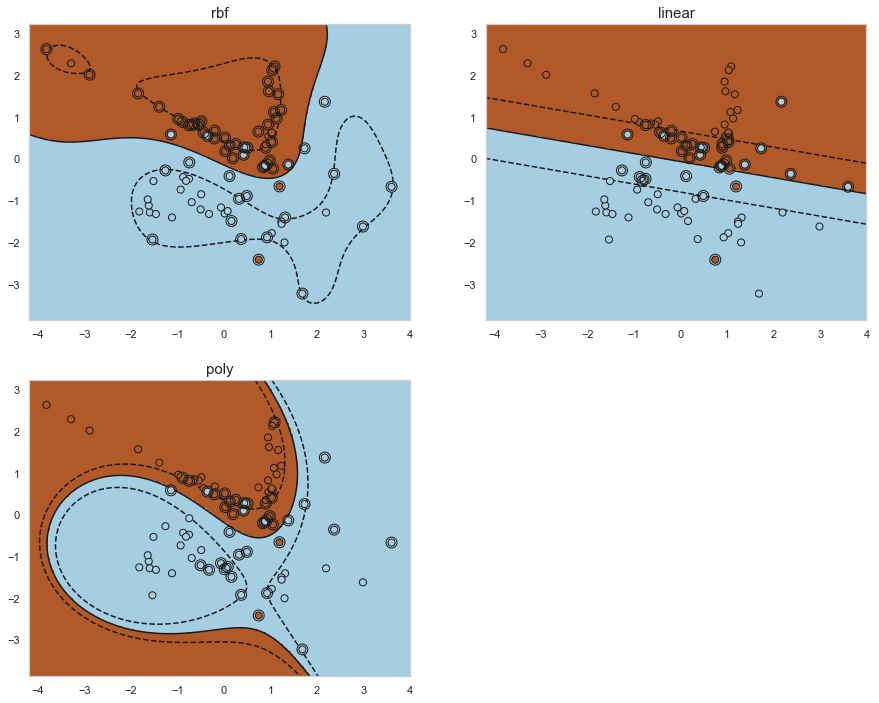

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from cvxpysvm import SVM

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
plt.figure(fig_num, figsize=(15, 12))

for fig_num, kernel in enumerate(('rbf', 'linear', 'poly')):
    clf = SVM(kernel=kernel)
    clf.fit(X_train, y_train)
    
    plt.subplot(2, 2, fig_num + 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=50)

    # Circle out the test data
    plt.scatter(X_train[clf.support, 0], X_train[clf.support, 1], s=120, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    x_min -= 0.05 * np.abs(x_max - x_min)
    x_max += 0.05 * np.abs(x_max - x_min)
    y_min = X[:, 1].min() * 1.1
    y_max = X[:, 1].max() * 1.1
    y_min -= 0.05 * np.abs(y_max - y_min)
    y_max += 0.05 * np.abs(y_max - y_min)

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-1, 0, 1])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(kernel, size=15)